## Detector model: Kiukas / Ruschhaupt / Schmidt / Werner

In [287]:
from sympy import *
#from sympy.physics.matrices import mdft
from sympy.physics.quantum import TensorProduct
from sympy.functions.special.delta_functions import Heaviside
from sympy.physics.quantum.dagger import Dagger
from sympy.plotting import plot, plot3d_parametric_line

from scipy.linalg import expm

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['text.usetex'] = False

# https://matplotlib.org/gallery/mplot3d/lines3d.html?highlight=parametric
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


In [100]:
Ds = Matrix([
    [0, 1],
    [1, 0]
])

In [101]:
v = Matrix([11, 12, 21, 22, 31, 32])

In [102]:
I3xDs = TensorProduct(eye(3), Ds)

In [103]:
I3xDs

⎡0  1  0  0  0  0⎤
⎢                ⎥
⎢1  0  0  0  0  0⎥
⎢                ⎥
⎢0  0  0  1  0  0⎥
⎢                ⎥
⎢0  0  1  0  0  0⎥
⎢                ⎥
⎢0  0  0  0  0  1⎥
⎢                ⎥
⎣0  0  0  0  1  0⎦

### Bipartite Multiplication

## Detector model

In [104]:
gamma = Symbol('gamma', real=True)
t = Symbol('t', real=True)
tprime = Symbol('t\'', real=True)
omega = Symbol('omega', real=True)

In [105]:
def D(_gamma):
    return Rational(1, 2) * Matrix([
        [0, 0],
        [0, _gamma]
    ])

In [106]:
H = Matrix ([
[0, 1] ,
[1, 0]
])

In [107]:
init_printing ()


In [108]:
H

⎡0  1⎤
⎢    ⎥
⎣1  0⎦

In [109]:
H.eigenvects()

⎡⎛       ⎡⎡-1⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞⎤
⎢⎜-1, 1, ⎢⎢  ⎥⎥⎟, ⎜1, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝       ⎣⎣1 ⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠⎦

It's manually seen that $\langle H \rangle = 0$ and $\langle H^2 \rangle = 1$, therefore $\sigma_{H} = 1$.

In [110]:
def K(_gamma):
    return H - I*D(_gamma)

In [111]:
K(2*sqrt(2))

⎡0    1  ⎤
⎢        ⎥
⎣1  -√2⋅ⅈ⎦

In [112]:
K(2*sqrt(2)).eigenvects()

⎡⎛                ⎡⎡   -1    ⎤⎤⎞  ⎛              ⎡⎡    -1     ⎤⎤⎞⎤
⎢⎜                ⎢⎢─────────⎥⎥⎟  ⎜              ⎢⎢───────────⎥⎥⎟⎥
⎢⎜  √2   √2⋅ⅈ     ⎢⎢√2   √2⋅ⅈ⎥⎥⎟  ⎜√2   √2⋅ⅈ     ⎢⎢  √2   √2⋅ⅈ⎥⎥⎟⎥
⎢⎜- ── - ────, 1, ⎢⎢── + ────⎥⎥⎟, ⎜── - ────, 1, ⎢⎢- ── + ────⎥⎥⎟⎥
⎢⎜  2     2       ⎢⎢2     2  ⎥⎥⎟  ⎜2     2       ⎢⎢  2     2  ⎥⎥⎟⎥
⎢⎜                ⎢⎢         ⎥⎥⎟  ⎜              ⎢⎢           ⎥⎥⎟⎥
⎣⎝                ⎣⎣    1    ⎦⎦⎠  ⎝              ⎣⎣     1     ⎦⎦⎠⎦

In [113]:
def B(_gamma):
    return lambda t: exp(-I*K(_gamma)*t)

In [114]:
def U():
    return lambda t: exp(-I*H*t)

In [115]:
def non_unitary_psi(_t):
    return B(2*sqrt(2))(_t) * Matrix([1,0])

In [116]:
def unitary_psi(_t):
    return U()(_t) * Matrix([1,0])

In [117]:
non_unitary_psi(t)

⎡          √2⋅t   √2⋅ⅈ⋅t             √2⋅t   √2⋅ⅈ⋅t⎤
⎢        - ──── - ──────           - ──── + ──────⎥
⎢           2       2                 2       2   ⎥
⎢√2⋅ⅈ⋅t⋅ℯ                  √2⋅ⅈ⋅t⋅ℯ               ⎥
⎢─────────────────────── - ───────────────────────⎥
⎢     ⎛√2⋅t   √2⋅ⅈ⋅t⎞           ⎛√2⋅t   √2⋅ⅈ⋅t⎞   ⎥
⎢   2⋅⎜──── + ──────⎟         2⋅⎜──── - ──────⎟   ⎥
⎢     ⎝ 2       2   ⎠           ⎝ 2       2   ⎠   ⎥
⎢                                                 ⎥
⎢          √2⋅t   √2⋅ⅈ⋅t         √2⋅t   √2⋅ⅈ⋅t    ⎥
⎢        - ──── - ──────       - ──── + ──────    ⎥
⎢           2       2             2       2       ⎥
⎢    √2⋅ℯ                  √2⋅ℯ                   ⎥
⎢    ─────────────────── - ───────────────────    ⎥
⎣             2                     2             ⎦

New period

In [118]:
2*pi / (sqrt(2)/2)

Components are either pure real or pure imaginary:

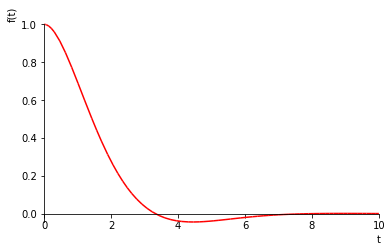

In [119]:
plot(re(non_unitary_psi(t)[0]), (t, 0, 10), line_color='r')

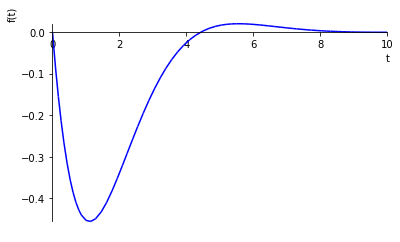

In [120]:
plot(im(non_unitary_psi(t)[1]), (t, 0, 10), line_color='b')

In [121]:
def lossy_norm(_t):
    psi = B(2*sqrt(2))(_t) * Matrix([1,0])
    return abs(psi[0])**2 + abs(psi[1])**2

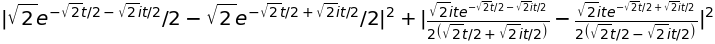

In [122]:
lossy_norm(t)

In [123]:
non_unitary_psi_n = lambdify(t, non_unitary_psi(t), "numpy")

In [124]:
lossy_norm_n = lambdify(t, lossy_norm(t), "numpy")

In [125]:
def non_unitary_psi_renorm_n(_t):
    return non_unitary_psi_n(_t) / np.sqrt(lossy_norm_n(_t))

In [126]:
T = np.linspace(1e-16, 10, 2000)

Text(0.5, 0, 't')

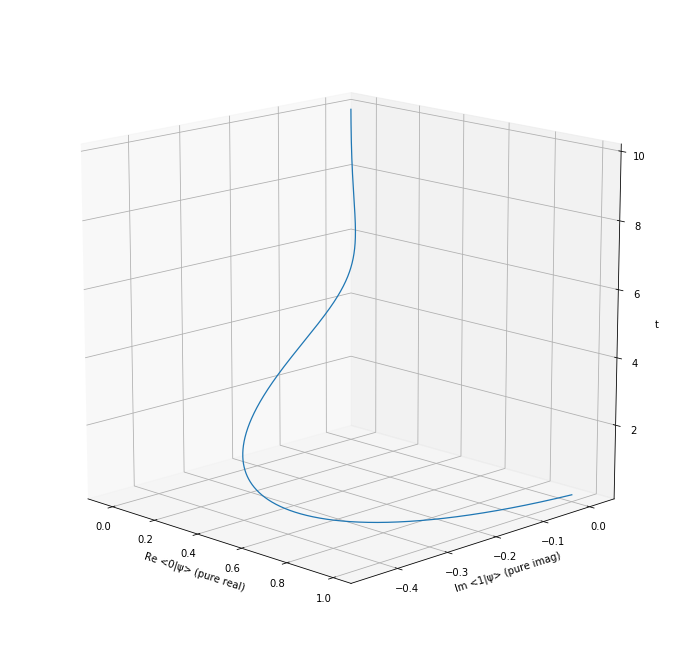

In [127]:
fig = plt.figure(figsize=(12,12))

ax = fig.gca(projection='3d')
ax.view_init(15,-45) # rotate 3d point of view

ax.plot(
    np.real(non_unitary_psi_n(T)[0][0]), np.imag(non_unitary_psi_n(T)[1][0]), T,
    linewidth=1.25
)

##ax.legend()

plt.xlabel('Re <0|\u03C8> (pure real)')
plt.ylabel('Im <1|\u03C8> (pure imag)')
ax.set_zlabel('t')


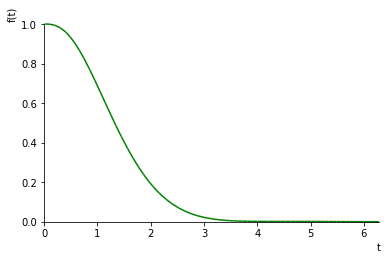

In [128]:
plot(lossy_norm(t),(t, 0, 2*pi), line_color='g')

In [129]:
def prob_0_detect(t):
    return abs(non_unitary_psi(t)[0]**2) / lossy_norm(t)

In [130]:
def prob_1_detect(t):
    return abs(non_unitary_psi(t)[1]**2) / lossy_norm(t)

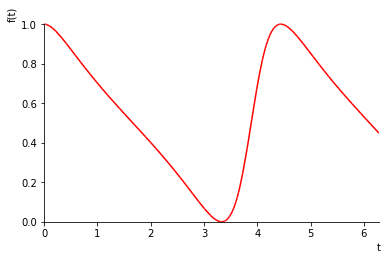

In [131]:
plot(prob_0_detect(t),(t, 0, 2*pi), line_color='r')

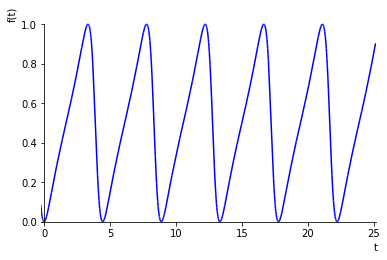

In [132]:
plot(prob_1_detect(t),(t, -0.25, 8*pi), line_color='b')

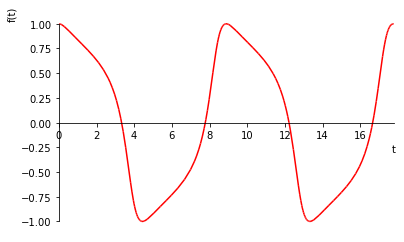

In [133]:
plot(re(non_unitary_psi(t)[0])/sqrt(lossy_norm(t)), (t, 0, 2 * 2*sqrt(2)*pi), line_color='r')

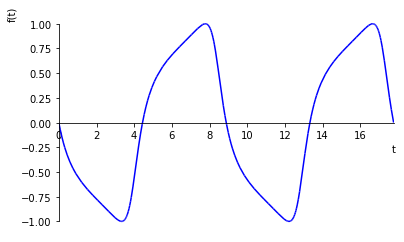

In [134]:
plot(im(non_unitary_psi(t)[1])/sqrt(lossy_norm(t)), (t, 0, 2 * 2*sqrt(2)*pi), line_color='b')

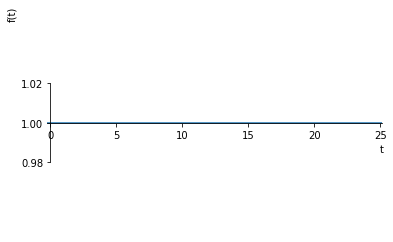

In [135]:
plot(prob_0_detect(t) + prob_1_detect(t),(t, -0.25, 8*pi))

In [136]:
#plot(log(abs(non_unitary_psi(t)[0]**2)), (t, -0.25, 8*pi), adaptive=False, nb_of_points=5000)

In [137]:
#plot(log(abs(non_unitary_psi(t)[1]**2)), (t, -0.25, 8*pi), adaptive=False, nb_of_points=5000)

In [138]:
def prob_0_unitary(t):
    return abs(unitary_psi(t)[0]**2)

In [139]:
def prob_1_unitary(t):
    return abs(unitary_psi(t)[1]**2)

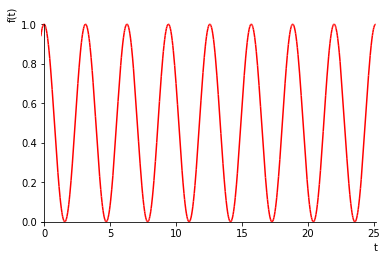

In [140]:
plot(prob_0_unitary(t),(t, -0.25, 8*pi), line_color='r')

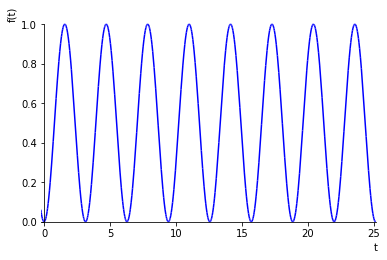

In [141]:
plot(prob_1_unitary(t),(t, -0.25, 8*pi), line_color='b')

In [142]:
lossy_norm_n(2)

In [143]:
X = np.linspace(1e-6, 8*np.pi, 5000)  # avoid singularity in t=0

In [144]:
Y = lossy_norm_n(X)

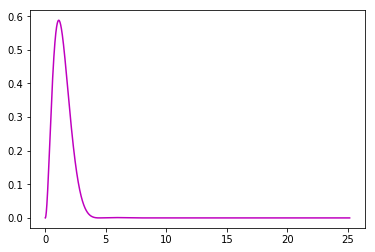

In [145]:
plt.plot(X, -np.gradient(Y, X), 'm')

In [146]:
# we have set gamma = 2*sqrt(2)
def hatpsi(_t):
    return \
        Heaviside(_t) * \
        2**(3/4) * \
        Matrix([
            [0, 0],
            [0, 1]
        ]) * \
        non_unitary_psi(_t)
        
        
    

In [147]:
def hatpsisquarednorm(_t):
    return abs(hatpsi(_t)[0]**2) + abs(hatpsi(_t)[1]**2)

In [148]:
hatpsisquarednorm(-1)

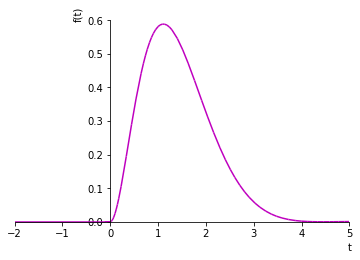

In [149]:
plot(hatpsisquarednorm(t), (t, -2, 5), line_color='m')

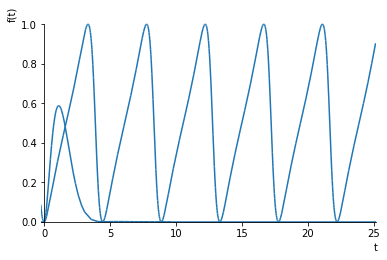

In [150]:
plot(prob_1_detect(t), hatpsisquarednorm(t), (t, -0.25, 8*pi))

In [151]:
def prob_0_hatpsi(_t):
    return abs(hatpsi(_t)[0]**2) / (abs(hatpsi(_t)[0]**2) + abs(hatpsi(_t)[1]**2))

In [152]:
def prob_1_hatpsi(_t):
    return abs(hatpsi(_t)[1]**2) / (abs(hatpsi(_t)[0]**2) + abs(hatpsi(_t)[1]**2))

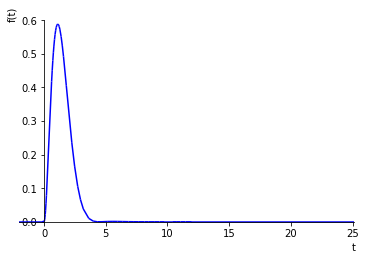

In [153]:
plot( abs(hatpsi(t)[1]**2), (t, -2, 8*pi), line_color='b')

In [154]:
im(hatpsi(t)[1])

In [155]:
def fhatpsi1(_omega):
    return fourier_transform(hatpsi(t)[1], t, _omega)

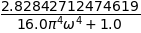

In [156]:
abs(fhatpsi1(omega))**2

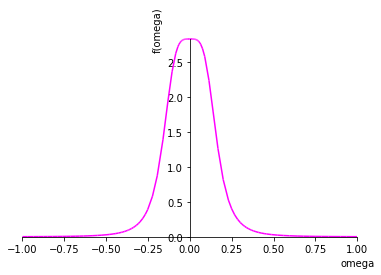

In [157]:
plot(abs(fhatpsi1(omega))**2, (omega, -1, 1), line_color='magenta')

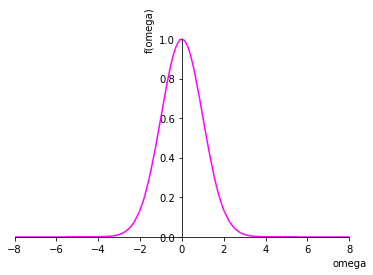

In [158]:
# compare with a gaussian
plot(
    exp(-(omega**2)/2), (omega, -8, 8), 
    line_color='magenta'
)

## (Discrete) Page-Wootters model

In [159]:
from scipy.linalg import dft

In [160]:
T = np.diag(np.arange(0,32)) * np.pi / 16

In [161]:
# The NumPy Fourier matrix is the conjugate of Mathematica's one,
# hence the trailing .conj() 
F = dft(32, scale='sqrtn').conj()

In [162]:
F[3][8]

(-8.831770080096235e-17-0.1767766952966368j)

In [163]:
F[8][3]

(-3.2473352108830995e-17-0.17677669529663687j)

In [164]:
F_dagger = F.conj().T

In [165]:
F_dagger[0][0]

(0.17677669529663687+0j)

In [166]:
F_dagger

array([[ 0.1767767 +0.j        ,  0.1767767 +0.j        ,
         0.1767767 +0.j        , ...,  0.1767767 +0.j        ,
         0.1767767 +0.j        ,  0.1767767 +0.j        ],
       [ 0.1767767 +0.j        ,  0.17337998-0.03448742j,
         0.16332037-0.06764951j, ...,  0.14698445+0.09821187j,
         0.16332037+0.06764951j,  0.17337998+0.03448742j],
       [ 0.1767767 +0.j        ,  0.16332037-0.06764951j,
         0.125     -0.125j     , ...,  0.06764951+0.16332037j,
         0.125     +0.125j     ,  0.16332037+0.06764951j],
       ...,
       [ 0.1767767 +0.j        ,  0.14698445+0.09821187j,
         0.06764951+0.16332037j, ..., -0.03448742-0.17337998j,
         0.06764951-0.16332037j,  0.14698445-0.09821187j],
       [ 0.1767767 +0.j        ,  0.16332037+0.06764951j,
         0.125     +0.125j     , ...,  0.06764951-0.16332037j,
         0.125     -0.125j     ,  0.16332037-0.06764951j],
       [ 0.1767767 +0.j        ,  0.17337998+0.03448742j,
         0.16332037+0.06764951

In [167]:
Omega = F @ T @ F_dagger * 16 / np.pi

In [168]:
H = np.array([
    [0, 1],
    [1, 0]
])

In [169]:
D = np.array([
    [0, 0],
    [0, np.sqrt(2)]
])

In [170]:
K = H - 1j*D

In [171]:
K

array([[0.+0.j        , 1.+0.j        ],
       [1.+0.j        , 0.-1.41421356j]])

In [172]:
J = np.kron(Omega, np.eye(2)) + np.kron(np.eye(32), K)

In [272]:
eigenvalues, eigenvectors = np.linalg.eig(J)

In [273]:
eigenvectors

array([[ 1.25000000e-01-3.82460552e-16j, -1.03933702e-01-6.94462791e-02j,
         8.83883476e-02-8.83883476e-02j, ...,
         1.15484942e-01+4.78354290e-02j,  2.43862903e-02+1.22598160e-01j,
         1.25000000e-01-3.83086783e-15j],
       [-8.83883476e-02-8.83883476e-02j, -1.22598160e-01+2.43862903e-02j,
        -1.25000000e-01+7.26741480e-16j, ...,
        -4.78354290e-02-1.15484942e-01j,  6.94462791e-02-1.03933702e-01j,
         8.83883476e-02-8.83883476e-02j],
       [ 1.25000000e-01-6.77844444e-17j, -1.15484942e-01-4.78354290e-02j,
         1.03933702e-01-6.94462791e-02j, ...,
        -8.83883476e-02-8.83883476e-02j,  2.06022577e-15-1.25000000e-01j,
        -1.25000000e-01+3.92746279e-15j],
       ...,
       [-8.83883476e-02-8.83883476e-02j, -1.22598160e-01-2.43862903e-02j,
        -1.15484942e-01+4.78354290e-02j, ...,
        -1.15484942e-01-4.78354290e-02j,  2.43862903e-02-1.22598160e-01j,
         8.83883476e-02-8.83883476e-02j],
       [ 1.25000000e-01-1.55381140e-15j, -8.

In [274]:
Dprime = np.array([
    [0, 0],
    [0, 2**(5/4)]
])
toa = np.kron(np.eye(32), Dprime) @ eigenvectors
np.abs(toa[1] + toa[21])

array([5.94603558e-01, 3.30344037e-01, 3.30344037e-01, 2.27544930e-01,
       5.94603558e-01, 3.30344037e-01, 2.27544930e-01, 5.83178417e-01,
       3.30344037e-01, 2.27544930e-01, 5.83178417e-01, 4.20448208e-01,
       2.27544930e-01, 5.83178417e-01, 4.20448208e-01, 5.83178417e-01,
       1.16001400e-01, 4.20448208e-01, 1.16001400e-01, 4.20448208e-01,
       5.49342057e-01, 1.16001400e-01, 5.49342057e-01, 1.16001400e-01,
       4.94394789e-01, 5.49342057e-01, 4.94394789e-01, 5.49342057e-01,
       2.03557141e-14, 4.94394789e-01, 2.21792594e-14, 4.94394789e-01,
       4.94394789e-01, 1.45914099e-14, 4.94394789e-01, 6.05682372e-15,
       5.49342057e-01, 5.49342057e-01, 4.94394789e-01, 4.94394789e-01,
       1.16001400e-01, 1.16001400e-01, 5.49342057e-01, 5.49342057e-01,
       4.20448208e-01, 4.20448208e-01, 1.16001400e-01, 1.16001400e-01,
       5.83178417e-01, 5.83178417e-01, 4.20448208e-01, 4.20448208e-01,
       2.27544930e-01, 5.83178417e-01, 3.30344037e-01, 2.27544930e-01,
      

In [275]:
def qubit_history(eigenindex):
    # Needs matrix transposition ".T" (different convention as opposed to Mathematica)
    eigenvector = eigenvectors.T[eigenindex]
    eigenvalue = eigenvalues[eigenindex]
    _qubit_history = np.empty([32, 2], dtype=np.complex)
    for i in range(0,32):
        t = i * 2 * np.pi / 32
        qubit = np.array([
            eigenvector[2*i],
            eigenvector[2*i+1]
        ]) * np.exp(-1j * t * eigenvalue)
        _qubit_history[i] = qubit
    return _qubit_history

In [288]:
eigenvalue = eigenvalues[1]
expm(-1j*T*eigenvalue)

array([[ 1.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        , ...,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.86892829+0.05002675j,
         0.        +0.j        , ...,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.7525337 +0.08693932j, ...,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       ...,
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        , ..., -0.00172728+0.01775528j,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        , ...,  0.        +0.j        ,
        -0.00238913+0.01534165j,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j       

In [277]:
T

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.19634954, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.39269908, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 5.69413668, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 5.89048623,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        6.08683577]])

In [289]:
def qubit_history_alt(eigenindex):
    # Needs matrix transposition ".T" (different convention as opposed to Mathematica)
    eigenvector = eigenvectors.T[eigenindex]
    eigenvalue = eigenvalues[eigenindex]
    _qubit_history = np.empty([32, 2], dtype=np.complex)
    eigenvector_fixed = np.kron(expm(-1j*T*eigenvalue), np.eye(2)) @ eigenvector
    for i in range(0,32):
        t = i * 2 * np.pi / 32
        qubit = np.array([
            eigenvector_fixed[2*i],
            eigenvector_fixed[2*i+1]
        ])
        _qubit_history[i] = qubit
    return _qubit_history

In [291]:
# Find the best linear combination to obtain |0> as initial state
max_prob0 = 0
max_prob0_i = 0
max_prob0_j = 0
for i in range(32):
    for j in range(32):
        qbi = qubit_history_alt(i)
        qbj = qubit_history_alt(j)
        qbit_hist = qbi + qbj
        prob0 = np.abs(qbit_hist[0][0]**2) / (
            np.abs(qbit_hist[0][0]**2) + np.abs(qbit_hist[0][1]**2)
        )
        if prob0 > max_prob0:
            max_prob0 = prob0
            max_prob0_i = i
            max_prob0_j = j
print (max_prob0_i, max_prob0_j, max_prob0)
    

2 7 1.0


In [292]:
# start with |0> as close as possible
qbhist = qubit_history_alt(2) + qubit_history_alt(7) 

In [294]:
np.abs(qbhist[0][0]**2) / (np.abs(qbhist[0][0]**2) + np.abs(qbhist[0][1]**2)) 

In [295]:
# A phase factor to make it real
qbhist = qbhist * np.exp(-1j * np.angle(qbhist[0][0]))

In [296]:
# And a factor to normalize the initial state
qbhist = qbhist / sqrt(
    np.abs(qbhist[0][0]**2) + np.abs(qbhist[0][1]**2)
)

In [297]:
qbhist = qbhist.astype(complex)

Consitently with "odinary QM" findings, the component along |0> stays purely real, and the component along |1> stays purely imaginary.

In [299]:
# Fill data for plotting
times = np.arange(0, 2*np.pi, np.pi/16)
norms = np.zeros(32)
probs0 = np.zeros(32)
probs1 = np.zeros(32)
# Components 0 are pure real, componets 1 are pure imag
real_parts0 = np.real(qbhist.T[0])
imag_parts1 = np.imag(qbhist.T[1])

for i in range(0, 32):
    norms[i] = (np.abs(qbhist[i][0]**2) + np.abs(qbhist[i][1]**2))
    probs0[i] = np.abs(qbhist[i][0]**2) / (
        np.abs(qbhist[i][0]**2) + np.abs(qbhist[i][1]**2) )
    probs1[i] = np.abs(qbhist[i][1]**2) / (
        np.abs(qbhist[i][0]**2) + np.abs(qbhist[i][1]**2) )

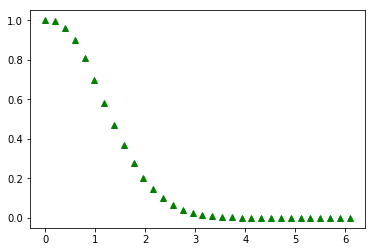

In [301]:
plt.plot(times, norms/norms[0], 'g^')

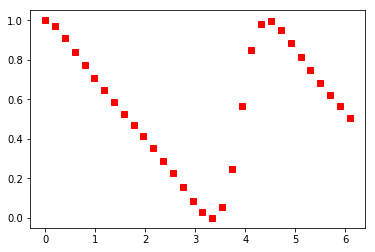

In [302]:
plt.plot(times, probs0, 'rs')

Text(0.5, 0, 't')

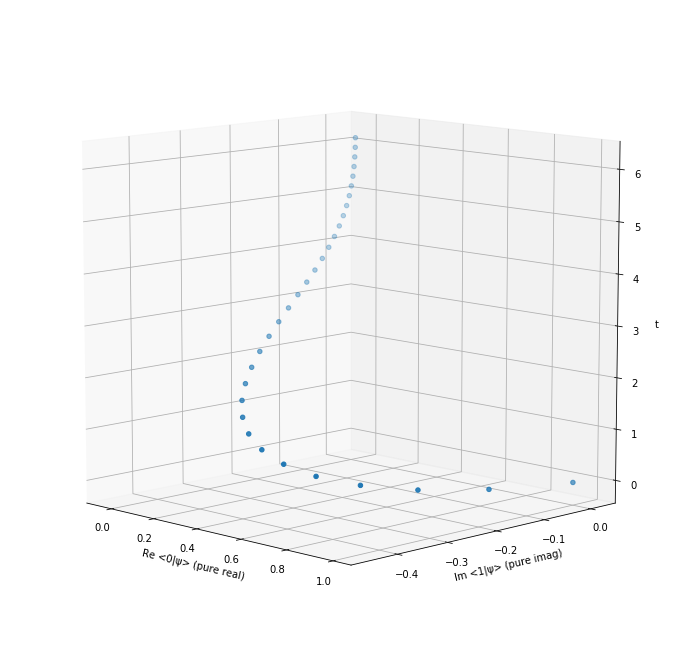

In [303]:
fig = plt.figure(figsize=(12,12))

#ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')
ax.view_init(10,-45) # rotate 3d point of view

ax.scatter(
    real_parts0, imag_parts1, times
)

##ax.legend()

plt.xlabel('Re <0|\u03C8> (pure real)')
plt.ylabel('Im <1|\u03C8> (pure imag)')
ax.set_zlabel('t')


## Detection event

In [192]:
eigenvalues[21]

(26.292893218813422-0.7071067811865451j)

In [193]:
sqr2D = np.array([
    [0, 0],
    [0, 2**(5/4)]
])

In [194]:
np.kron(np.eye(32), sqr2D) * eigenvectors

array([[ 0.        +0.j        ,  0.        -0.j        ,
         0.        +0.j        , ...,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        -0.j        , -0.29158921+0.0580007j ,
        -0.        +0.j        , ...,  0.        -0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        -0.j        ,
         0.        +0.j        , ...,  0.        -0.j        ,
         0.        +0.j        , -0.        +0.j        ],
       ...,
       [ 0.        -0.j        ,  0.        -0.j        ,
        -0.        +0.j        , ..., -0.27467103-0.11377247j,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        -0.j        ,
         0.        +0.j        , ..., -0.        +0.j        ,
         0.        -0.j        , -0.        +0.j        ],
       [ 0.        -0.j        , -0.        +0.j        ,
        -0.        +0.j       

### Check that "linear combinations of qubit histories" work as expected

In [195]:
qbhist1 = np.array([
    [0, 1],
    [2, 3]
])

In [196]:
qbhist2 = np.array([
    [4, 5],
    [6, 7]
])

In [197]:
qbhist1 + qbhist2

array([[ 4,  6],
       [ 8, 10]])